# Import Library & Dataset


*   Mengimpor library yang dibutuhkan
*   Load dataset harga rumah



In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [2]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/Content/Housing Price Dataset/housing_price_dataset.csv')

# Data Understanding


*   Menampilkan informasi dataset
*   Menampilkan deskripsi dataset pada kolom nominal
*   Menampilkan 5 data teratas
*   Menampilkan grafik distribusi harga rumah
*   Menampilkan plot hubungan luas rumah dan harga rumah
*   Menampilkan grafik distribusi jumlah kamar
*   Menampilkan boxplot harga rumah berdasarkan jumlah kamar
*   Menampilkan grafik distribusi rata-rata harga rumah berdasarkan lokasi neighborhood
*   Menampilkan grafik harga rata-rata rumah berdasarkan tahun pembangunan
*   Mengecek apakah terdapat missing value
*   Mengecek apakah terdapat data duplikat











In [3]:
# Exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
# Deskripsi dataset
data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [5]:
data.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


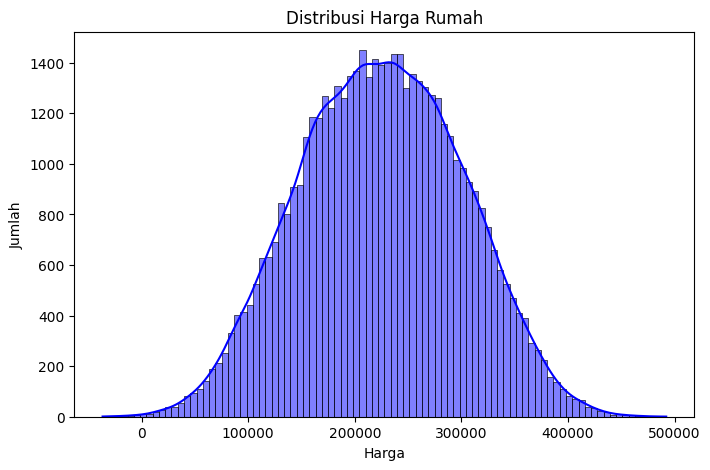

In [6]:
# Distribusi Harga Rumah
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Jumlah')
plt.show()

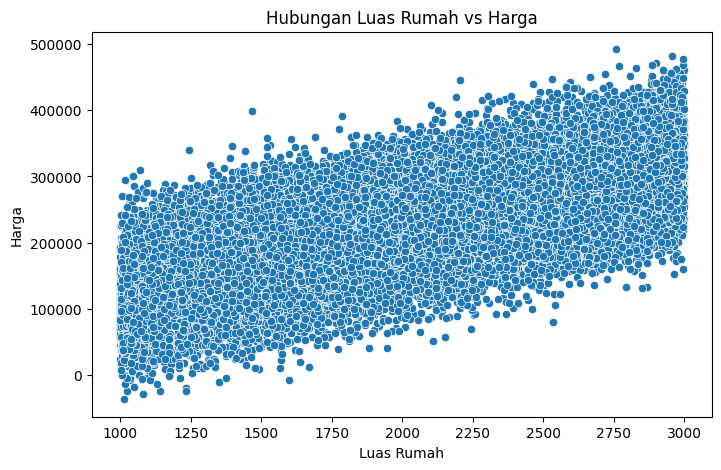

In [7]:
# Hubungan Luas Rumah vs Harga
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['SquareFeet'], y=data['Price'])
plt.title('Hubungan Luas Rumah vs Harga')
plt.xlabel('Luas Rumah')
plt.ylabel('Harga')
plt.show()

<ipython-input-8-432dbfe9862d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Bedrooms'], palette='viridis')


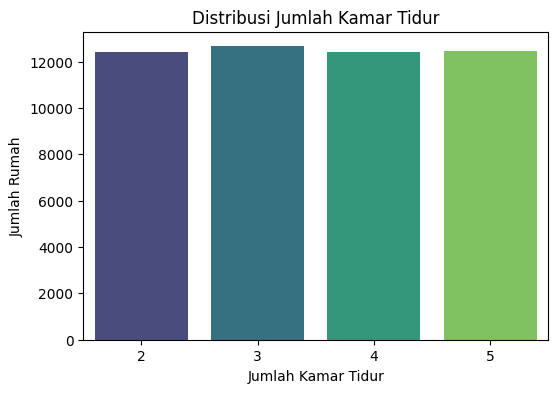

In [8]:
# Distribusi Jumlah Kamar Tidur
plt.figure(figsize=(6,4))
sns.countplot(x=data['Bedrooms'], palette='viridis')
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Jumlah Rumah')
plt.show()

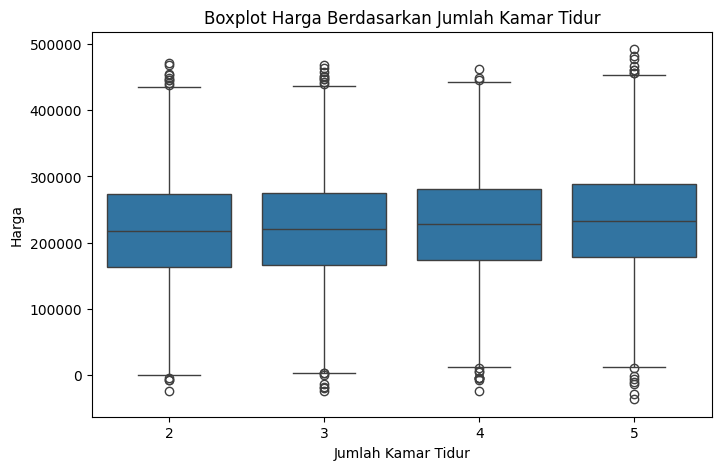

In [9]:
# Boxplot Harga Berdasarkan Jumlah Kamar Tidur
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Bedrooms'], y=data['Price'])
plt.title('Boxplot Harga Berdasarkan Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.show()

<ipython-input-10-bc7ddf396d38>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Neighborhood'], y=data['Price'], estimator=np.mean, ci=None)


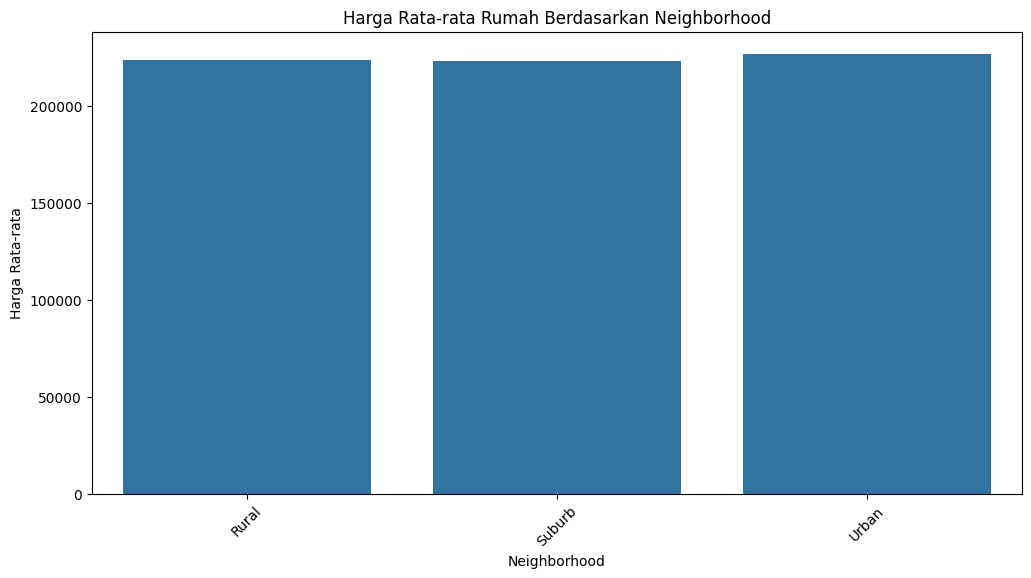

In [10]:
# Harga Rata-rata Rumah Berdasarkan Neighborhood
plt.figure(figsize=(12,6))
sns.barplot(x=data['Neighborhood'], y=data['Price'], estimator=np.mean, ci=None)
plt.title('Harga Rata-rata Rumah Berdasarkan Neighborhood')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Harga Rata-rata')
plt.show()

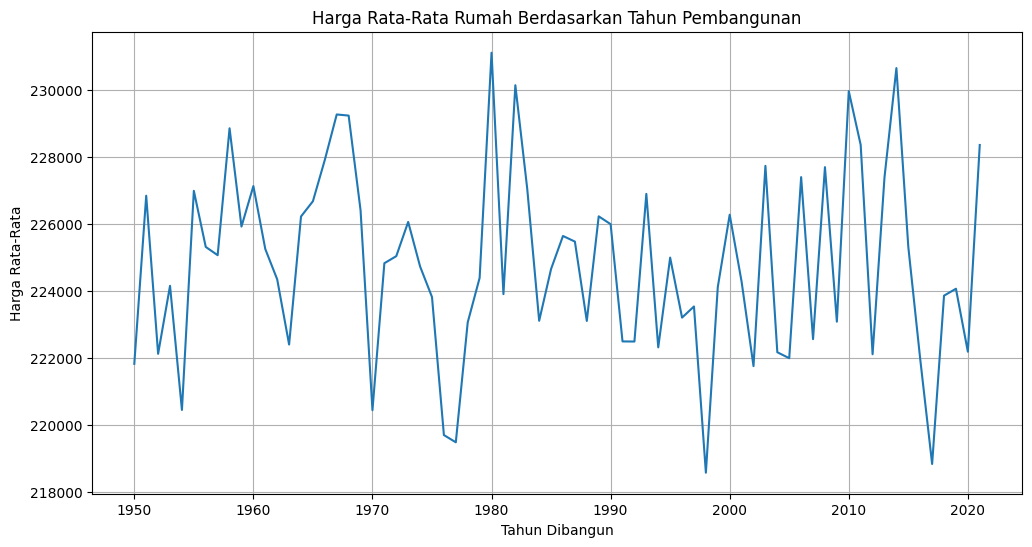

In [11]:
# Harga Rata-Rata Rumah Berdasarkan Tahun Pembangunan
plt.figure(figsize=(12,6))
year_price = data.groupby('YearBuilt')['Price'].mean().reset_index()

sns.lineplot(data=year_price, x='YearBuilt', y='Price')
plt.title('Harga Rata-Rata Rumah Berdasarkan Tahun Pembangunan')
plt.xlabel('Tahun Dibangun')
plt.ylabel('Harga Rata-Rata')
plt.grid(True)
plt.show()

In [12]:
# Pengecekan missing value
data.isna().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [31]:
# Cek data duplikat
duplicate_rows = data[data.duplicated()]
print("Jumlah data duplikat:", len(duplicate_rows))
duplicate_rows

Jumlah data duplikat: 0


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


# Data Preparation

*   Mengkonversi kolom Neighborhood
*   Mengubah kolom YearBuilt dengan membangun kolom BuildingAge
*   Split dataset dengan perbandingan 80:20
*   Scaling data numerik dengan StandardScaler





In [13]:
# Konversi kolom Neighborhood dengan One-hot Encoding
data_encoded = pd.get_dummies(data, columns=['Neighborhood'], drop_first=False).astype(int)

In [14]:
# Inisialisasi tahun sekarang
current_year = pd.Timestamp.now().year

# Hitung BuildingAge dan tambahkan kolomnya
data_encoded['BuildingAge'] = current_year - data_encoded['YearBuilt']

data_encoded = data_encoded.drop('YearBuilt', axis=1)

In [15]:
data_encoded.head(5)

,SquareFeet,Bedrooms,Bathrooms,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,BuildingAge
0,2126,4,1,215355,1,0,0,56
1,2459,3,2,195014,1,0,0,45
2,1860,2,1,306891,0,1,0,55
3,2294,2,1,206786,0,0,1,29
4,2130,5,2,272436,0,1,0,24


In [16]:
# Pisahkan features dan target
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

In [17]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Scaling data kolom numerik
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'BuildingAge']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].head()

,SquareFeet,Bedrooms,Bathrooms,BuildingAge
39087,0.855384,-1.348036,1.228934,-1.721306
30893,0.650248,1.342476,1.228934,0.405561
45278,0.465973,1.342476,0.003431,1.372318
16398,0.363405,1.342476,-1.222072,0.405561
13653,0.125239,-1.348036,1.228934,1.130629


In [19]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [20]:
X_train.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,BuildingAge
39087,0.855384,-1.348036,1.228934,1,0,0,-1.721306
30893,0.650248,1.342476,1.228934,0,0,1,0.405561
45278,0.465973,1.342476,0.003431,0,0,1,1.372318
16398,0.363405,1.342476,-1.222072,0,1,0,0.405561
13653,0.125239,-1.348036,1.228934,0,1,0,1.130629


# Modeling

*   Membuat model prediksi dengan algoritma K-Nearest Neighbors
*   Membuat model prediksi dengan algoritma Random Forest
*   Membuat model prediksi dengan algoritma AdaBoost




In [21]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [22]:
# Prediksi dengan K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [23]:
# Prediksi dengan Random Forest
RF = RandomForestRegressor(n_estimators=24, max_depth=8, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [24]:
# Prediksi dengan AdaBoost
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=42)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation


*   Mengevaluasi model yang telah dibangun dengan menggunakan Mean Squared Error
*   Memilih model terbaik untuk digunakan dalam prediksi harga rumah



In [25]:
# Buat variabel MSE yang isinya adalah dataframe nilai MSE data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e5
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e5

# Panggil MSE
mse

,train,test
KNN,22604.983946,27001.187923
RF,23927.033786,24649.902284
Boosting,25544.243797,24808.125484


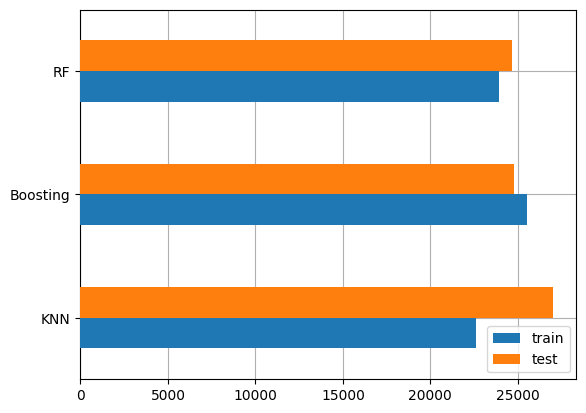

In [26]:
# Visualisasi perbandingan MSE

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [27]:
# Menampilkan perbandingan hasil prediksi model pada data test
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
33553,170835,223552.4,218113.1,214153.2
9427,126913,162184.5,138090.3,133181.4
199,246611,256938.8,253947.8,252410.2
12447,244250,257129.7,276715.6,255720.1
39489,271127,293945.1,275627.7,285921.7


In [28]:
# Menungkapkan fitur yang paling berpengaruh dalam prediksi harga rumah menurut algoritma Random Forest
importances = pd.Series(RF.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))

SquareFeet             0.968515
BuildingAge            0.013222
Bedrooms               0.011764
Bathrooms              0.003602
Neighborhood_Urban     0.001184
Neighborhood_Suburb    0.000894
Neighborhood_Rural     0.000819
dtype: float64
